In [84]:
import warnings
warnings.simplefilter("ignore")
import os
from keras.applications.resnet import ResNet50,preprocess_input
from keras.models import Model
from keras.utils import load_img, img_to_array
from keras.models import Sequential
from keras.layers import GlobalMaxPool2D
import joblib
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
tqdm.pandas()

In [4]:
project_path = ""
data_path = os.path.join(project_path,"data")
imgs_folder = os.path.join(data_path,"images")
test_imgs_folder = os.path.join(imgs_folder,"test/boys_apparel")

In [12]:
def get_resnet50_features(model,image,verbose=0):
    image = preprocess_input(image)
    features = model.predict(image, verbose=0)
    return features

In [15]:
model = joblib.load("data/models/resnet50_model")
image = load_img(os.path.join(test_imgs_folder,"41011.jpg"),target_size=(256,256))
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
feature = get_resnet50_features(model=model,image=image,verbose=0)

In [43]:
knn_model = joblib.load("data/models/knn_model")
knn_data = joblib.load("data/models/knn_data")

In [50]:
distances,indices = knn_model.kneighbors(feature)

In [75]:
image_ids = knn_data.index.values[indices].flatten()
image_file_names = [x+".jpg" for x in image_ids]
image_file_names

['33304.jpg', '31105.jpg', '33305.jpg', '38490.jpg', '34024.jpg']

In [83]:
# plot the images
# identify folders
img_cat_ls = []
for img_cat in os.listdir("data/images/train"):
    for image_name in image_file_names:
        if image_name in os.listdir(f"data/images/train/{img_cat}"):
            img_cat_ls.append(img_cat)

img_cat_ls

['boys_apparel',
 'boys_apparel',
 'boys_apparel',
 'boys_apparel',
 'boys_apparel']

In [105]:
imgs_final = []
for img_name,cat_name in zip(image_file_names,img_cat_ls):
    img_load_path = os.path.join(imgs_folder,f"train/{cat_name}/{img_name}")
    img_i = load_img(img_load_path,target_size=(256,256))
    imgs_final.append(img_i)

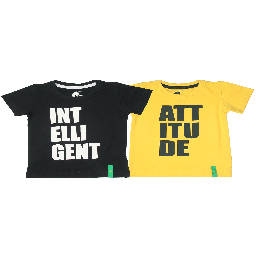

In [106]:
imgs_final[0]

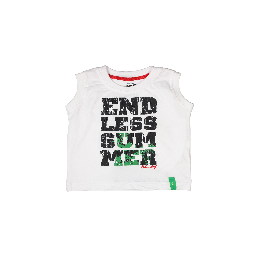

In [112]:
imgs_final[4]

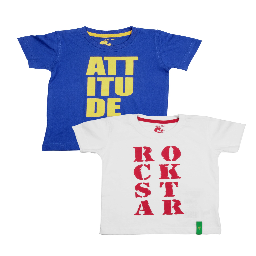

In [111]:
imgs_final[3]